## Importing the libraries and the dataset 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('census dataset.csv', na_values=['?'])

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.drop(['fnlwgt'], axis =1, inplace = True)
data.drop(['marital.status'], axis =1, inplace = True)
data.drop(['native.country'], axis =1, inplace = True)


## Renaming column names that have a '.' in their name bcz they will give an error while checking skewness and finding IQR 

In [5]:
data.rename(columns={'education.num': 'education_num','capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week'}, inplace=True)

## Checking OLS assumption 1 of linearity 

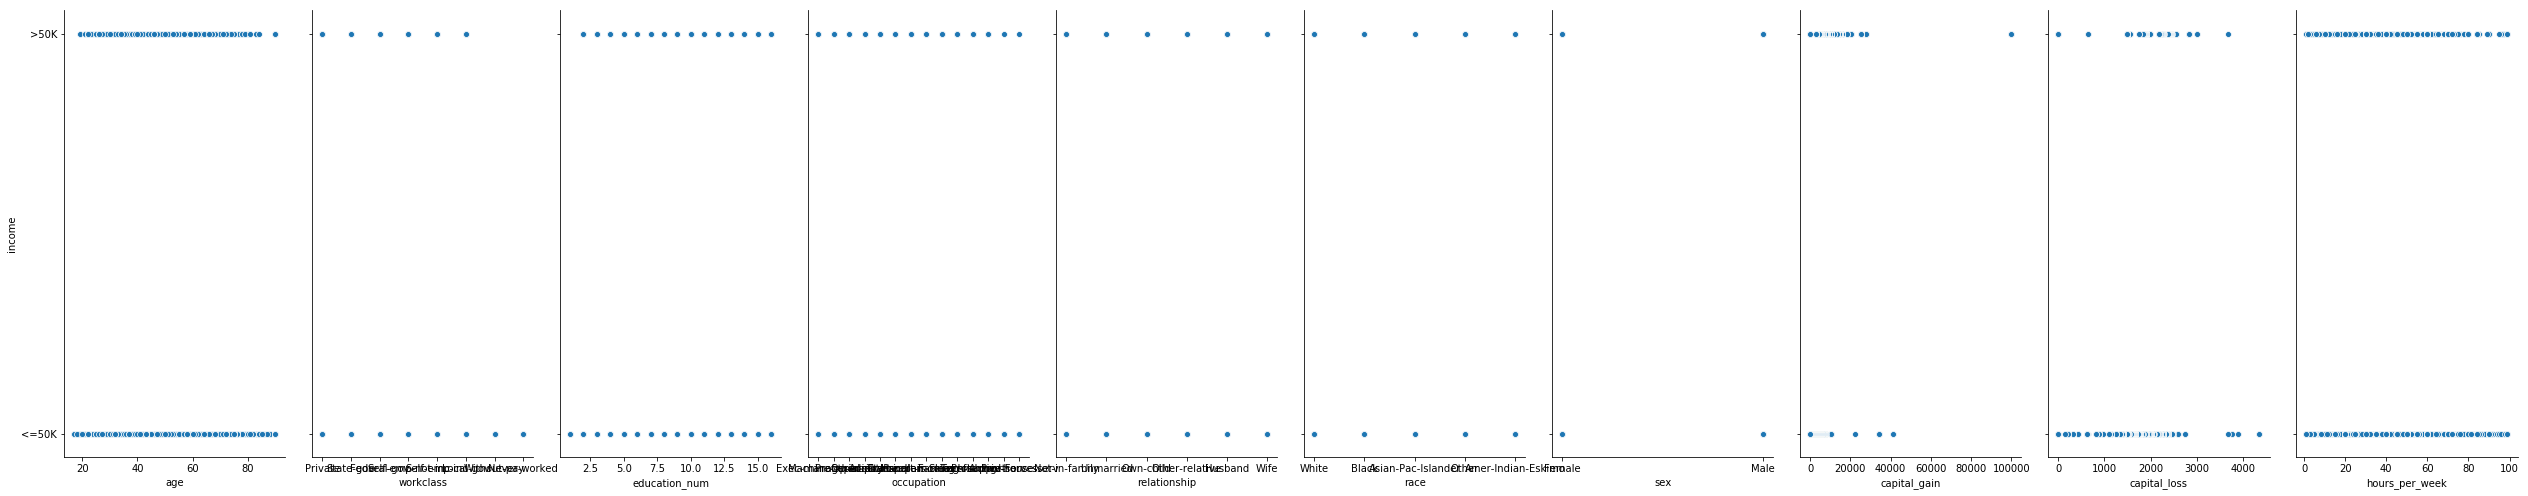

In [6]:
p = sns.pairplot(data, x_vars=['age', 'workclass', 'education_num', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week'], y_vars = 'income', size = 7, aspect = 0.5)

## Multicollinearity test

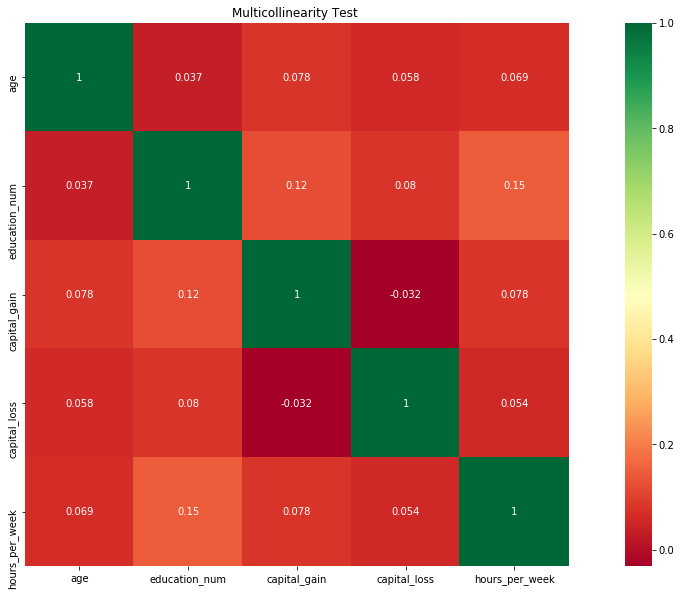

In [7]:
plt.figure(figsize = (20,10))
plt.title('Multicollinearity Test ')
sns.heatmap(data.corr(),annot = True,square=True,cmap='RdYlGn')
plt.show()

# EDA

## Seperating categorical and numerical data

In [8]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
data[categorical].head()

,workclass,education,occupation,relationship,race,sex,income
0,NaN,HS-grad,NaN,Not-in-family,White,Female,<=50K
1,Private,HS-grad,Exec-managerial,Not-in-family,White,Female,<=50K
2,NaN,Some-college,NaN,Unmarried,Black,Female,<=50K
3,Private,7th-8th,Machine-op-inspct,Unmarried,White,Female,<=50K
4,Private,Some-college,Prof-specialty,Own-child,White,Female,<=50K


In [9]:
numerical = [var for var in data.columns if data[var].dtype != 'O']
data[numerical].head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,90,9,0,4356,40
1,82,9,0,4356,18
2,66,10,0,4356,40
3,54,4,0,3900,40
4,41,10,0,3900,40


## Checking missing values 

In [10]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
income               0
dtype: int64

In [11]:
# since only about 5% of our data is missing we will drop the missing values 
data.dropna(inplace=True)
data.head()

,age,workclass,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
1,82,Private,HS-grad,9,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
3,54,Private,7th-8th,4,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,Some-college,10,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,HS-grad,9,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,10th,6,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K


In [12]:
data[categorical].isnull().sum()

workclass       0
education       0
occupation      0
relationship    0
race            0
sex             0
income          0
dtype: int64

In [13]:
data[numerical].isnull().sum()

age               0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

## Checking for outliers

In [14]:
data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,1106.037079,88.910216,40.949313
std,13.118227,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## We can observe that some of our features has outliers so we will visualize and treat them 

Text(0,0.5,'hours_per_week')

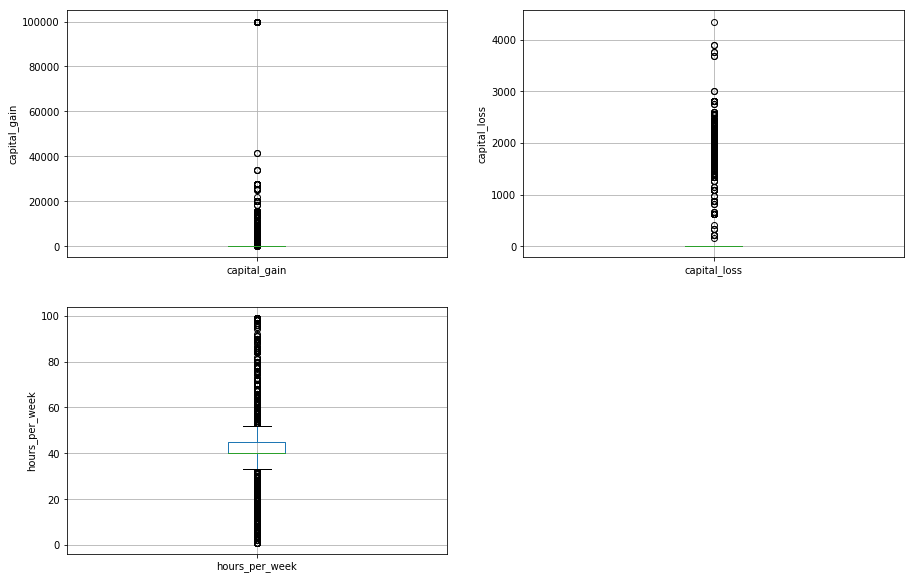

In [15]:
#creating a boxplot for visualization of outliers 
plt.figure(figsize=(15,10))

fig = plt.subplot(2,2,1)
fig = data.boxplot(column = 'capital_gain')
fig.set_title('')
fig.set_ylabel('capital_gain')

fig = plt.subplot(2,2,2)
fig = data.boxplot(column = 'capital_loss')
fig.set_title('')
fig.set_ylabel('capital_loss')

fig = plt.subplot(2,2,3)
fig = data.boxplot(column = 'hours_per_week')
fig.set_title('')
fig.set_ylabel('hours_per_week')

Text(0,0.5,'income')

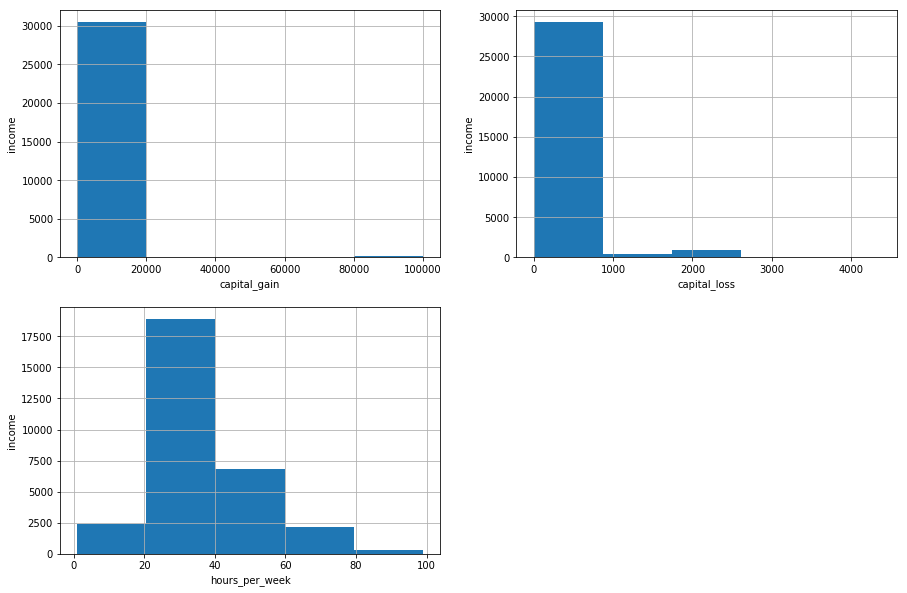

In [16]:
# now we'll check for skewness of these 4 varibles 
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = data.capital_gain.hist(bins=5)
fig.set_xlabel('capital_gain')
fig.set_ylabel('income')

plt.subplot(2,2,2)
fig = data.capital_loss.hist(bins=5)
fig.set_xlabel('capital_loss')
fig.set_ylabel('income')

plt.subplot(2,2,3)
fig = data.hours_per_week.hist(bins=5)
fig.set_xlabel('hours_per_week')
fig.set_ylabel('income')

In [17]:
#IQR (InterQuantile Range) for capital_gain
IQR = data.capital_gain.quantile(0.75) - data.capital_gain.quantile(0.25)
lower_fence = data.capital_gain.quantile(0.25) - (IQR * 3)
upper_fence = data.capital_gain.quantile(0.75) + (IQR * 3)
print(f'outliers value are <{lower_fence} and > {upper_fence}')

outliers value are <0.0 and > 0.0


In [18]:
#IQR (InterQuantile Range) for capital_loss
IQR = data.capital_loss.quantile(0.75) - data.capital_loss.quantile(0.25)
lower_fence = data.capital_loss.quantile(0.25) - (IQR * 3)
upper_fence = data.capital_loss.quantile(0.75) + (IQR * 3)
print(f'outliers value are <{lower_fence} and > {upper_fence}')

outliers value are <0.0 and > 0.0


In [19]:
#IQR (InterQuantile Range) for hours_per_week
IQR = data.hours_per_week.quantile(0.75) - data.hours_per_week.quantile(0.25)
lower_fence = data.hours_per_week.quantile(0.25) - (IQR * 3)
upper_fence = data.hours_per_week.quantile(0.75) + (IQR * 3)
print(f'outliers value are <{lower_fence} and > {upper_fence}')

outliers value are <25.0 and > 60.0


## Splitting the dataset 

In [20]:
#splitting into dependent and independent variable
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
#splitting into training and testing sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [22]:
print(x_train.dtypes)

age                int64
workclass         object
education         object
education_num      int64
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
dtype: object


In [23]:
#capping 
data['hours_per_week']=np.where(data['hours_per_week']>60,60,data['hours_per_week'])
#cupping
data['hours_per_week']=np.where(data['hours_per_week']<25,25,data['hours_per_week'])

In [24]:
#capping 
data['capital_loss']=np.where(data['capital_loss']>0,0,data['capital_loss'])
#cupping
data['capital_loss']=np.where(data['capital_loss']<0,0,data['capital_loss'])

In [25]:
#capping 
data['capital_gain']=np.where(data['capital_gain']>0,0,data['capital_gain'])
#cupping
data['capital_gain']=np.where(data['capital_gain']<0,0,data['capital_gain'])

In [26]:
data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,30718.000000,30718.000000,30718.0,30718.0,30718.000000
mean,38.443584,10.130314,0.0,0.0,41.201934
std,13.118227,2.562469,0.0,0.0,8.978929
min,17.000000,1.000000,0.0,0.0,25.000000
25%,28.000000,9.000000,0.0,0.0,40.000000
50%,37.000000,10.000000,0.0,0.0,40.000000
75%,47.000000,13.000000,0.0,0.0,45.000000
max,90.000000,16.000000,0.0,0.0,60.000000


In [27]:
x_train

,age,workclass,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
15201,27,Private,HS-grad,9,Sales,Not-in-family,White,Female,0,0,40
5741,60,Private,10th,6,Machine-op-inspct,Not-in-family,White,Female,0,0,40
26586,50,Private,HS-grad,9,Exec-managerial,Husband,White,Male,0,0,40
30324,49,Private,HS-grad,9,Craft-repair,Not-in-family,White,Male,0,0,50
26100,25,Local-gov,HS-grad,9,Prof-specialty,Own-child,Black,Female,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
13895,46,Private,HS-grad,9,Prof-specialty,Husband,White,Male,0,0,40
20794,21,State-gov,Assoc-acdm,12,Tech-support,Own-child,White,Male,0,0,10
10421,32,Private,5th-6th,3,Other-service,Husband,White,Male,0,0,40
11432,26,Private,Bachelors,13,Craft-repair,Husband,White,Male,0,0,40


## Encoding categorical variables

In [28]:

x_train = pd.get_dummies(x_train, columns=['workclass', 'occupation', 'relationship', 'race', 'sex','education'])
x_test = pd.get_dummies(x_test, columns=['workclass', 'occupation', 'relationship', 'race', 'sex','education'])


In [29]:
x_train

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
15201,27,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5741,60,6,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26586,50,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
30324,49,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
26100,25,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,46,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
20794,21,12,0,0,10,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10421,32,3,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11432,26,13,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
x_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
18261,41,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
23840,21,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2066,48,15,15024,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15775,64,9,0,0,21,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
31667,42,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,67,9,0,0,35,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2184,33,14,14084,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
13352,63,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
17718,52,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# Check the data types of the columns
print('x_train data types\n\n',x_train.dtypes)


# Similarly, check for x_test_dummies
print('x_test data types\n\n',x_test.dtypes)



x_train data types

 age                             int64
education_num                   int64
capital_gain                    int64
capital_loss                    int64
hours_per_week                  int64
workclass_Federal-gov           uint8
workclass_Local-gov             uint8
workclass_Private               uint8
workclass_Self-emp-inc          uint8
workclass_Self-emp-not-inc      uint8
workclass_State-gov             uint8
workclass_Without-pay           uint8
occupation_Adm-clerical         uint8
occupation_Armed-Forces         uint8
occupation_Craft-repair         uint8
occupation_Exec-managerial      uint8
occupation_Farming-fishing      uint8
occupation_Handlers-cleaners    uint8
occupation_Machine-op-inspct    uint8
occupation_Other-service        uint8
occupation_Priv-house-serv      uint8
occupation_Prof-specialty       uint8
occupation_Protective-serv      uint8
occupation_Sales                uint8
occupation_Tech-support         uint8
occupation_Transport-moving  

## Model training

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Predicting the results

In [33]:
y_pred = logreg.predict(x_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

## Predict proba

In [34]:
# probability of getting output as 0 - income not greater than 50k
logreg.predict_proba(x_test)[:,0]

array([0.79625518, 0.98940547, 0.0029275 , ..., 0.952498  , 0.93956681,
       0.93183825])

In [35]:
# probability of getting output as 1 - income greater than 50k
y_pred1 = logreg.predict_proba(x_test)[:,1]
y_pred1

array([0.20374482, 0.01059453, 0.9970725 , ..., 0.047502  , 0.06043319,
       0.06816175])

In [36]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

## Checking for overfitting and underfitting 

In [37]:
from sklearn.metrics import accuracy_score
print(f'Training-set accuracy score: {accuracy_score(y_train, y_pred_train)}')

Training-set accuracy score: 0.8462602750874908


## Now that we have the accuracy of training set lets compare it to the accuracy of the testing set 

In [38]:
print(f'Training-set accuracy score: {logreg.score(x_train, y_train)}')
print(f'Testing-set accuracy score: {logreg.score(x_test, y_test)}')

Training-set accuracy score: 0.8462602750874908
Testing-set accuracy score: 0.84912109375


In [39]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_pred,y_test)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[4320  625]
 [ 302  897]]


## The confusion matrix shows 4319 + 896 = 5215 correct predictions and 626 + 303 = 929 incorrect predictions 


In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 4319

True Negatives (Actual Negative:0 and Predict Negative:0) - 896

False Positives (Actual Negative:0 but Predict Positive:1) - 626 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 303 (Type II error)

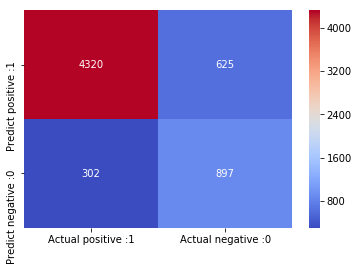

In [40]:
#visualizing confusion matrix using seaborn heatmp

c_matrix = pd.DataFrame(data = cm, columns =[ 'Actual positive :1', "Actual negative :0"],
                        index = ['Predict positive :1', 'Predict negative :0'] )
                                        
sns.heatmap(c_matrix ,annot = True, fmt = 'd',cmap = 'coolwarm')

## Classification accuracy & error

In [41]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [42]:
classification_accuracy = (TP + TN) / float (TP + TN + FP + FN)
print(f'Classification accuracy is {classification_accuracy:0.4f}')

Classification accuracy is 0.8491


In [43]:
classification_error = (FP + FN) / float (TP + TN + FP + FN)
print(f'Classification error is {classification_error:0.4f}')

Classification error is 0.1509


## Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [44]:
precision = TP / float (TP+FP)
print(f'precision = {precision:0.4f}')

precision = 0.8736


## Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [45]:
recall = TP / float (TP + FN)
print(f'Recall or sensitivity is {recall:.4f}')

Recall or sensitivity is 0.9347


## Specificity
it is alo known as False negative rate as it is the complete opposite of TPR(True positive rate) also known as recall

In [46]:
specificity = TN / float (TN + FP)
print(f'Specificity is {specificity:.4f}')

Specificity is 0.5894


## Classification Report & f1 score
Classification report is another way to evaluate the classification model performance.

f1 score f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4622
        >50K       0.75      0.59      0.66      1522

    accuracy                           0.85      6144
   macro avg       0.81      0.76      0.78      6144
weighted avg       0.84      0.85      0.84      6144



In [48]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,y_pred1)
print(f'ROC-AUC score is {ROC_AUC:.4}')

ROC-AUC score is 0.9055


## K fold cross validation 

In [49]:
from sklearn.model_selection import cross_val_score
cross_validated_ROC_AUC = cross_val_score(logreg, x_train, y_train, cv = 5, scoring = 'roc_auc').mean()
print(f'cross validated ROC_AUC is {cross_validated_ROC_AUC:.4f}')

cross validated ROC_AUC is 0.9016


In [50]:
from sklearn.model_selection import cross_val_score
cross_validated_accuracy = cross_val_score(logreg, x_train, y_train, cv = 5, scoring = 'accuracy')
print(f'cross validated accuracy is {cross_validated_accuracy}')

cross validated accuracy is [0.84272635 0.84537131 0.84903357 0.84313327 0.84289784]
